In [1]:
%run -i env_default.py

In [2]:
%run -i src/notebook_base_light.py

2025-12-03 02:02:16.801720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-03 02:02:16.801764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-03 02:02:16.803397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-03 02:02:16.811643: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from src.datasets.dataset import DatasetImageDir
from src.datasets.lost_and_found import DatasetLostAndFound
# dset = DatasetImageDir(dir_root='data/joint_pipeline_example')
dset = DatasetImageDir(dir_root='data/my_test_data/webdata')
dset.discover()

Discovered 2 frames - DatasetImageDir(2 frames, data/my_test_data/webdata, s=nosplit)


In [4]:
from types import SimpleNamespace
import torch

from src.a05_differences.E1_article_evaluation import DiscrepancyJointPipeline
from src.a01_sem_seg.deeplab_mobilenet_cityscapes_wrapper import DeepLabV3PlusMobileNetCityscapes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Build seg model
seg_model = DeepLabV3PlusMobileNetCityscapes(device=device)
seg_model.eval()

# Build joint pipeline
joint_pipeline = DiscrepancyJointPipeline()

# Attach seg model as exp_sem_seg
joint_pipeline.exp_sem_seg = SimpleNamespace(net_mod=seg_model)

# Init GAN + discrepancy
joint_pipeline.init_gan()
joint_pipeline.init_discrepancy()


Using device: cuda
[DeepLabV3PlusMobileNetCityscapes] Loading checkpoint from exp/0300_DeepLabV3Plus_MobileNet_Cityscapes/best_deeplabv3plus_mobilenet_cityscapes_os16.pth
[DeepLabV3PlusMobileNetCityscapes] missing keys: []
[DeepLabV3PlusMobileNetCityscapes] unexpected keys: []
Loading checkpoint found at /home/tzh005/detecting-the-unexpected/exp/0521_Diff_SwapFgd_ImgAndLabelVsGen_semGT/chk_best.pth
Building net


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading weights from checkpoint


/home/tzh005/detecting-the-unexpected/src/pipeline/transforms_pytorch.py:57: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_tr = torch.from_numpy(value.transpose(2, 0, 1))
/home/tzh005/detecting-the-unexpected/src/pipeline/pipeline.py:47: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/home/tzh005/detecting-the-unexpected/src/pipeline/pipel

anomaly prob min/max: 2.4832420445424592e-15 0.9999974966049194



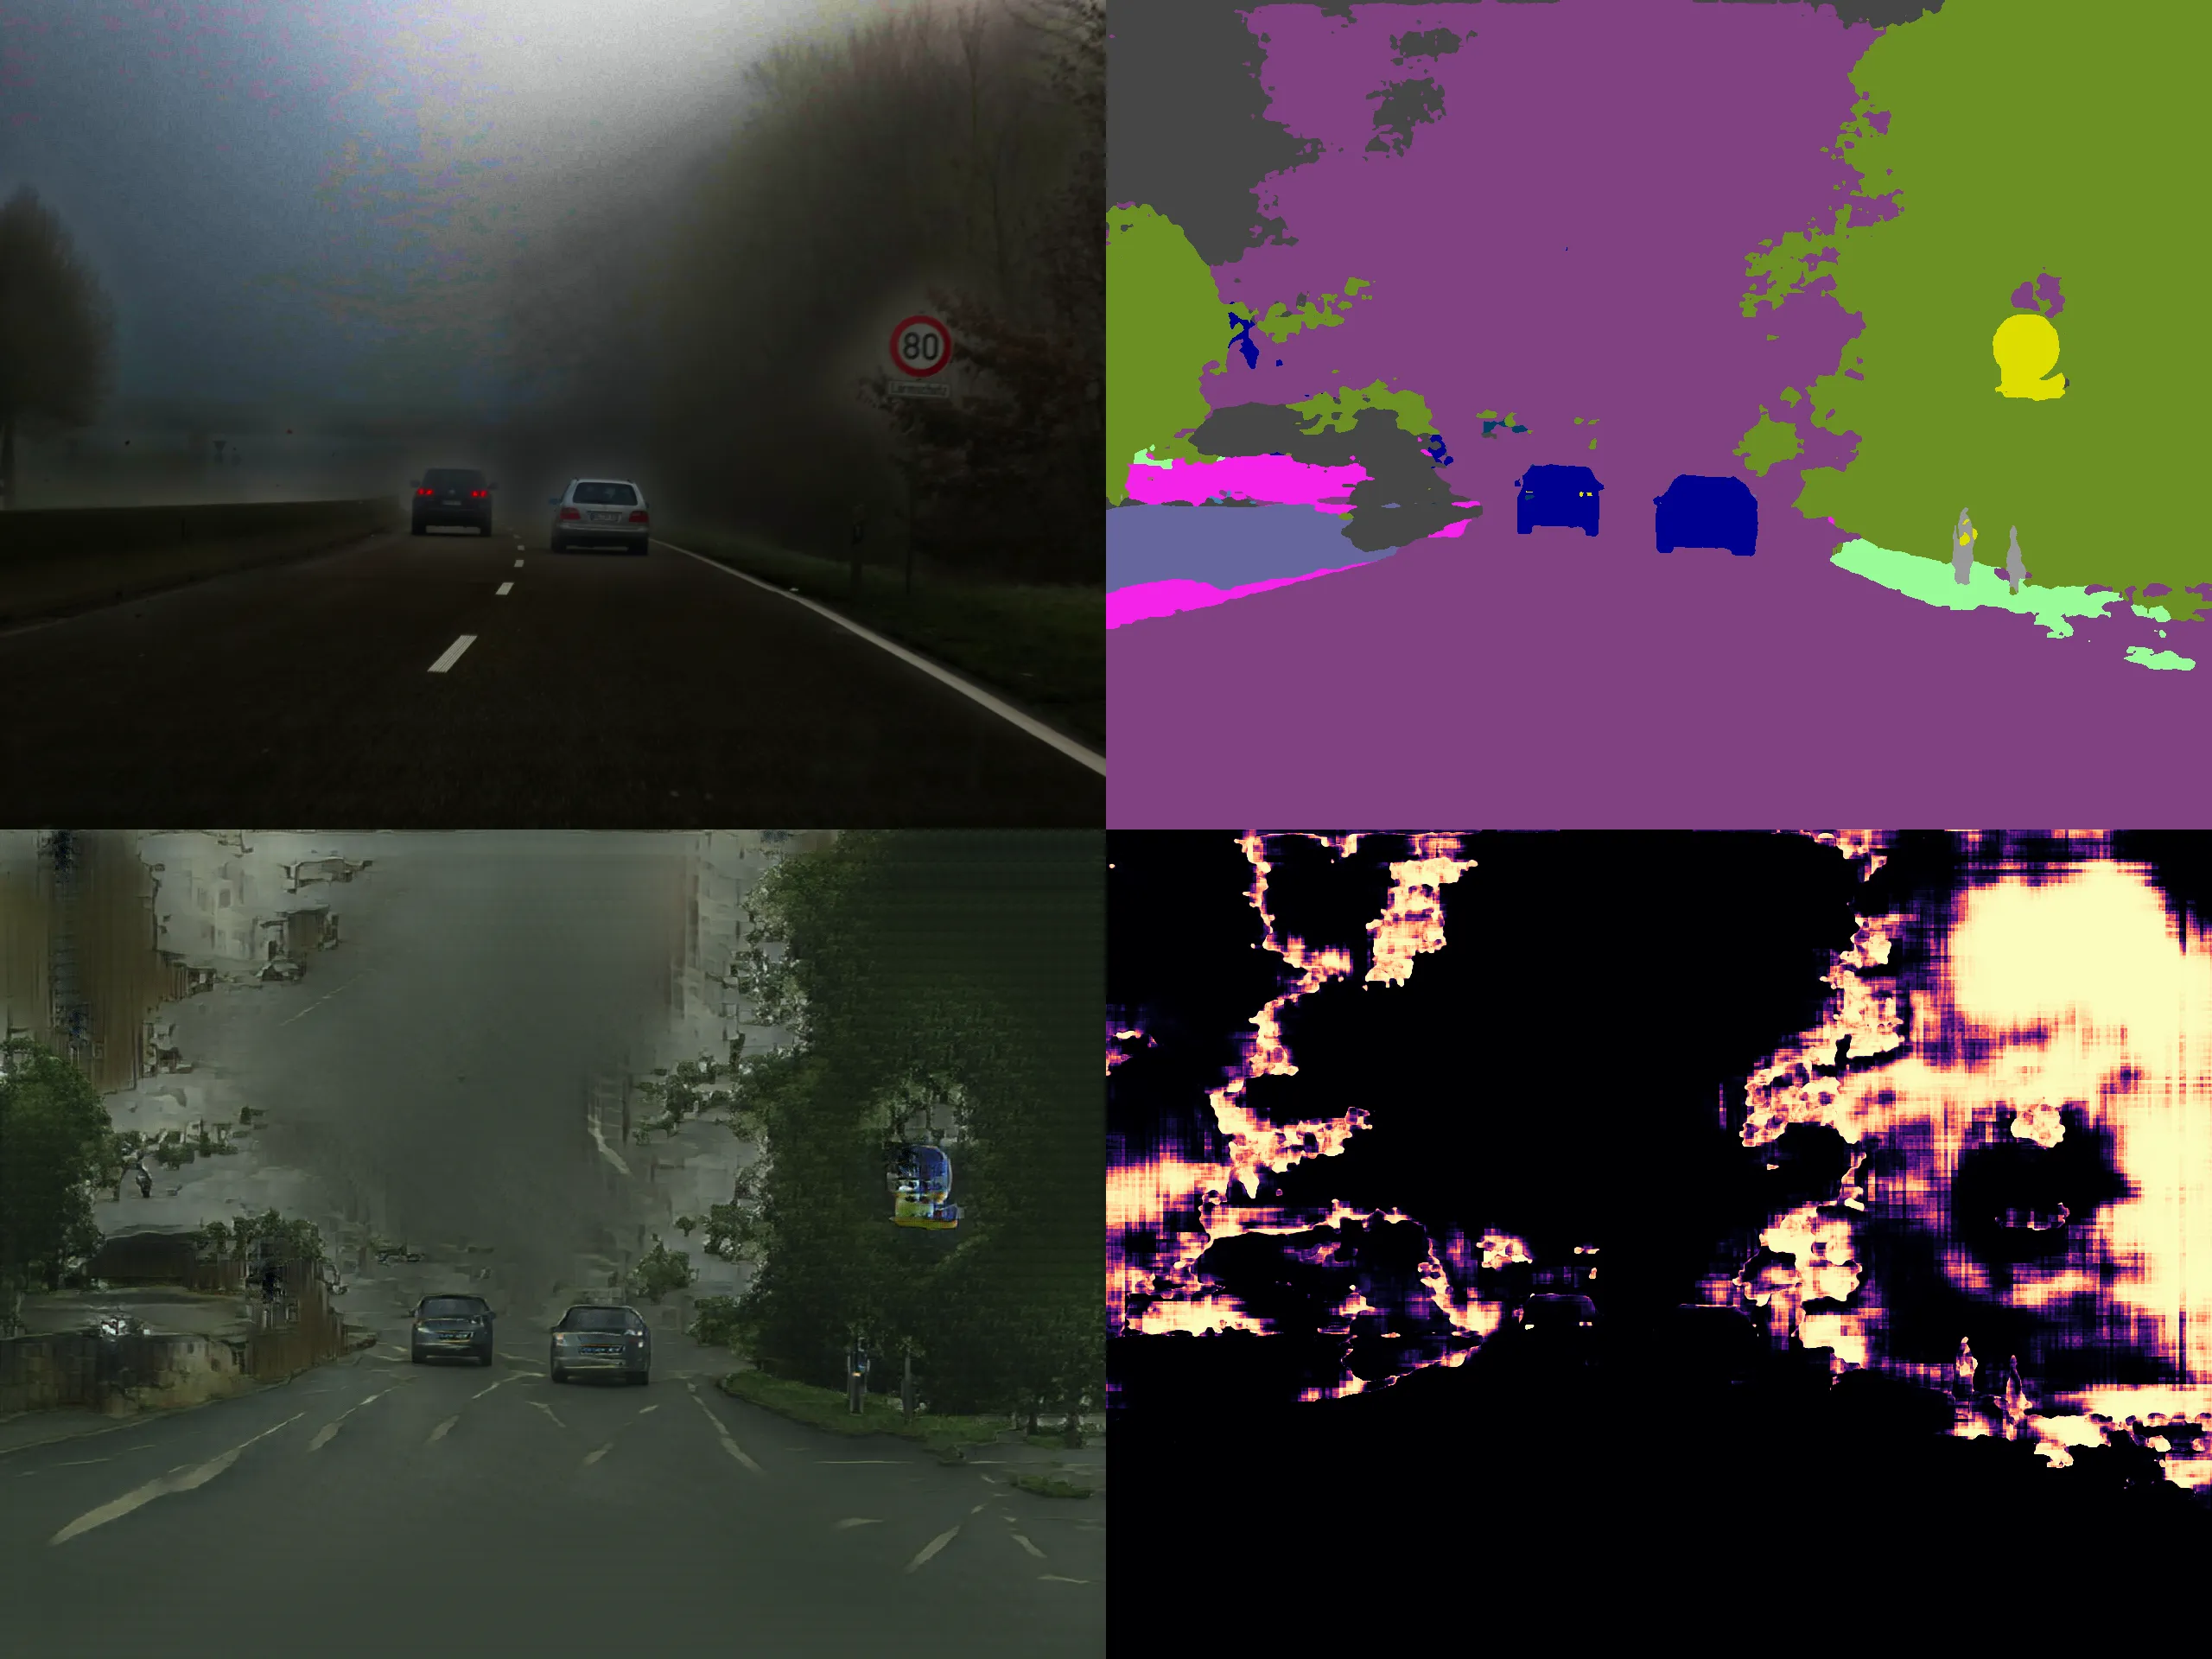


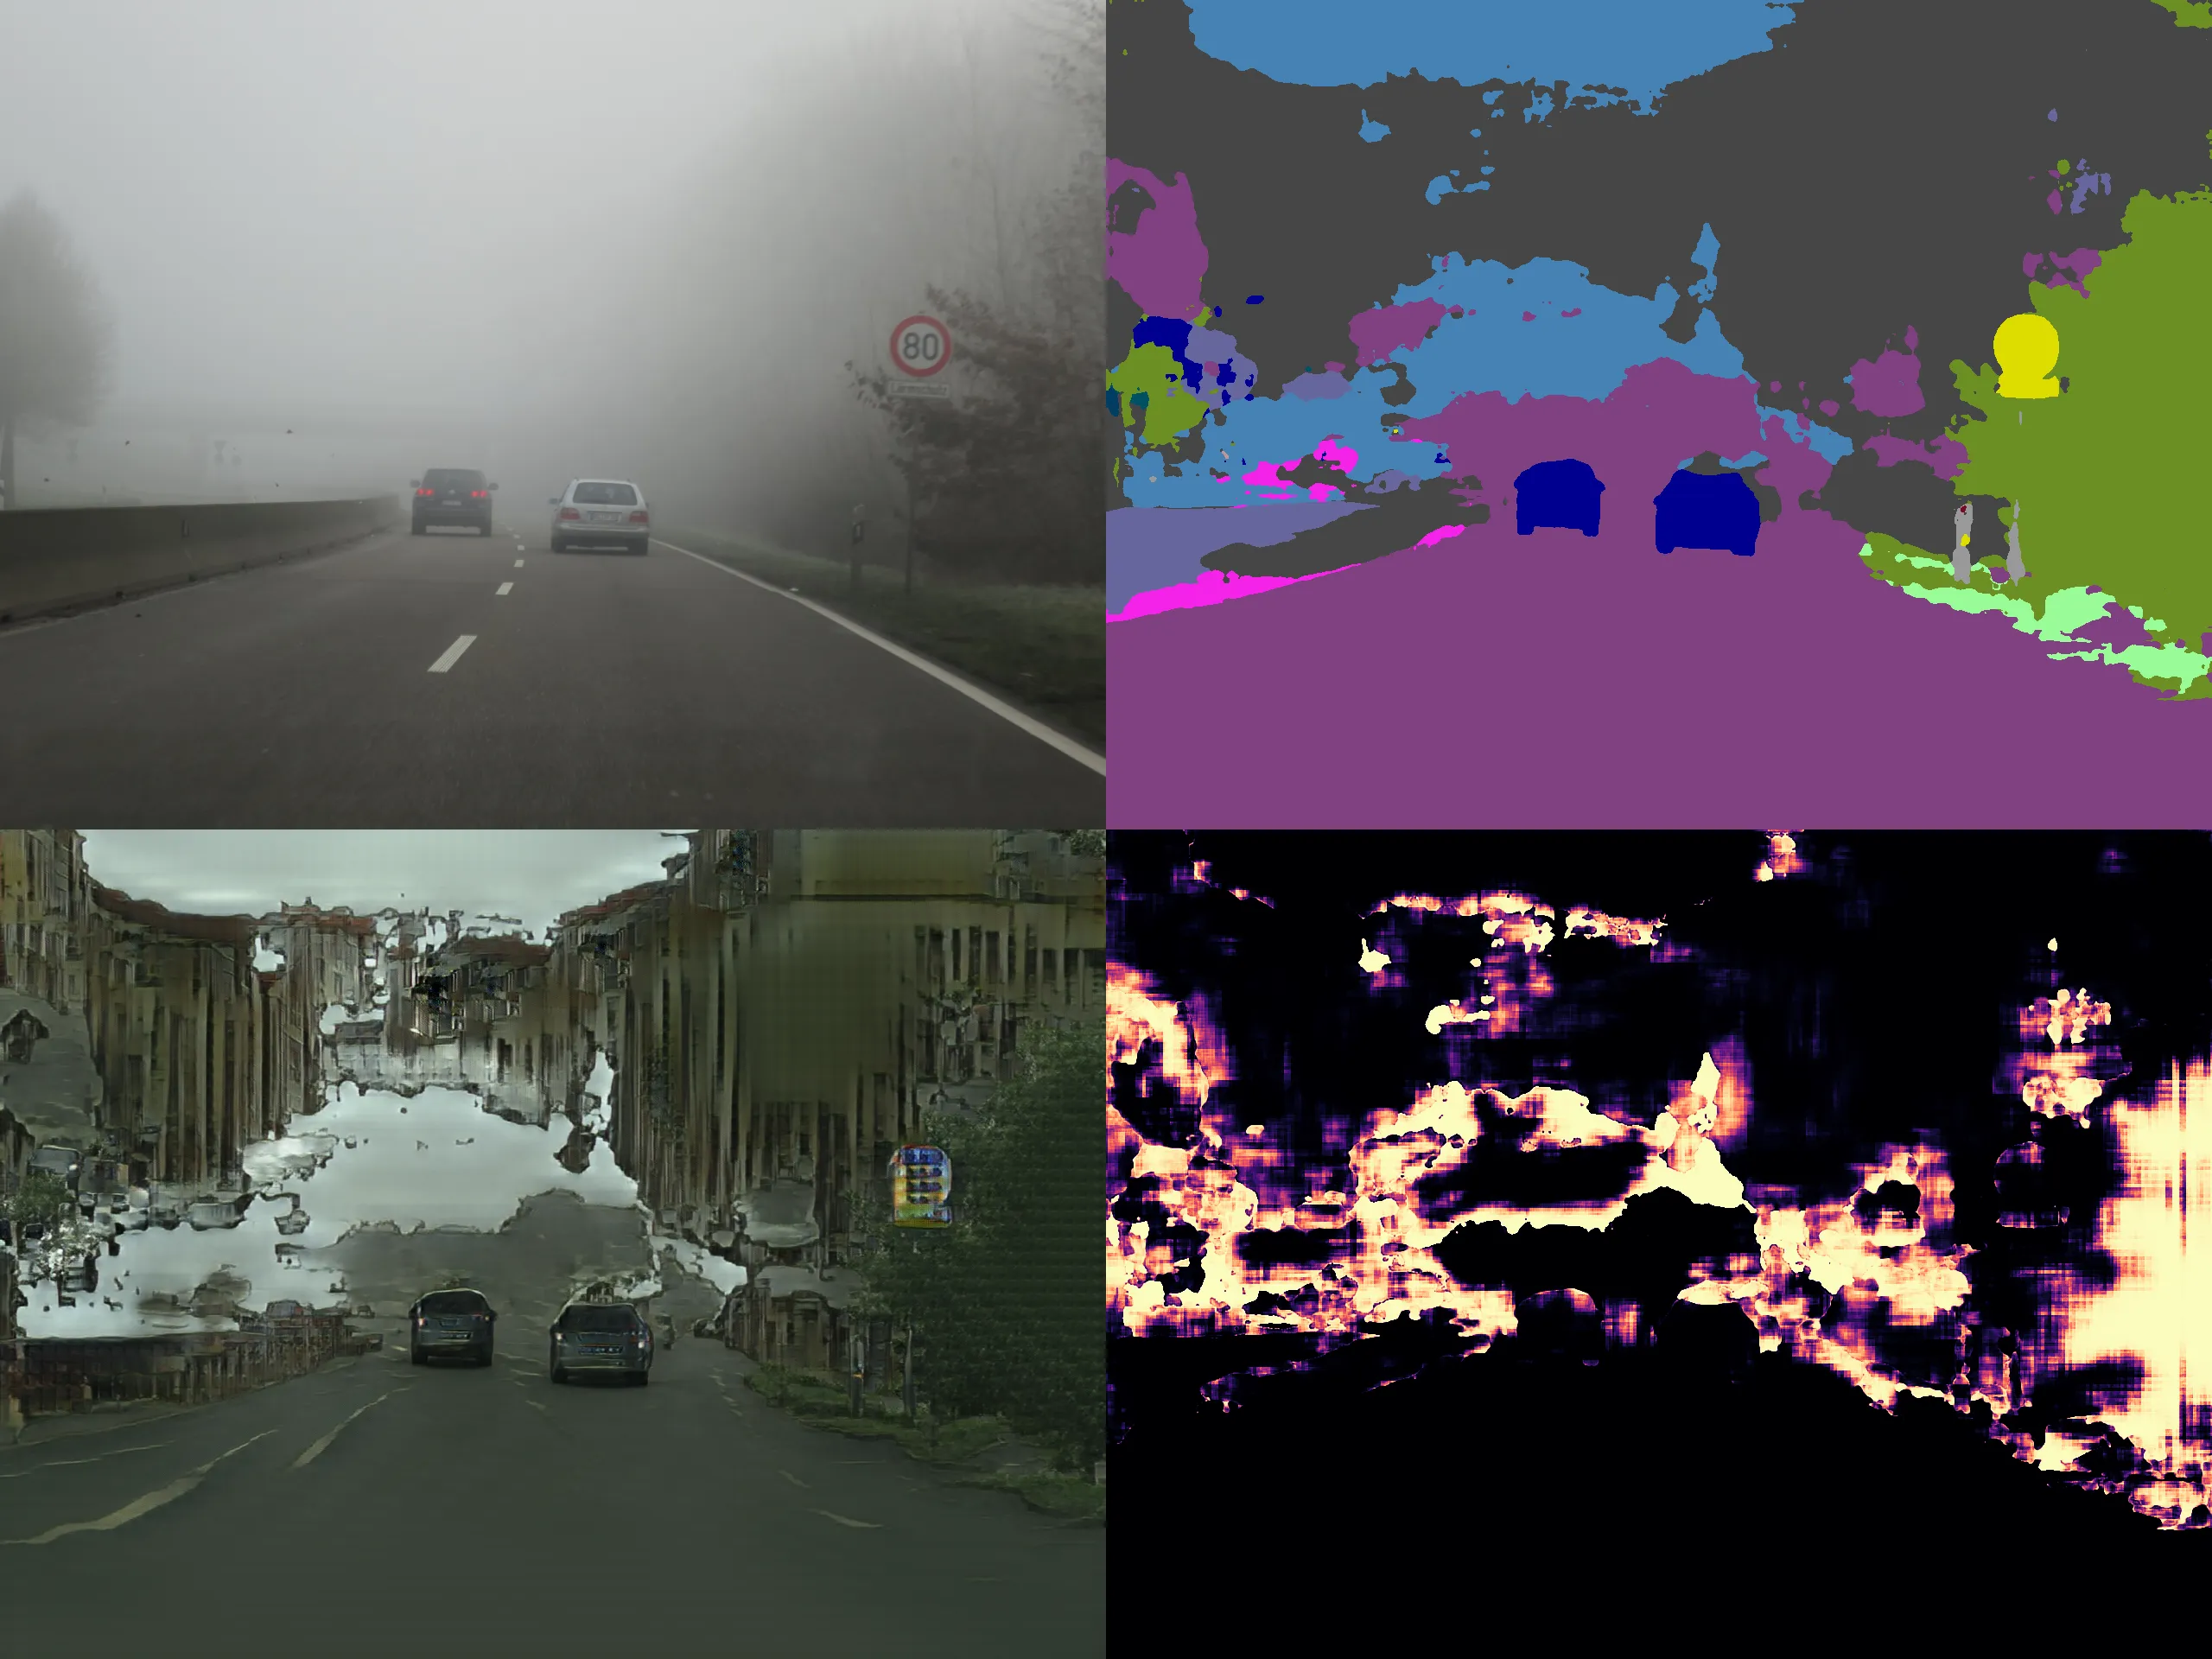

In [5]:
# run and show results in notebook
# joint_pipeline.set_batch_size(1)
joint_pipeline.run_on_dset(dset, b_show=True)

In [6]:
# run and show, write the output images
joint_pipeline.run_on_dset(dset, b_show=False)

  0%|          | 0/2 [00:00<?, ?it/s]/home/tzh005/detecting-the-unexpected/src/pipeline/transforms_pytorch.py:57: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_tr = torch.from_numpy(value.transpose(2, 0, 1))
/home/tzh005/detecting-the-unexpected/src/pipeline/pipeline.py:47: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = elem.storage()._new_shared(numel)
/home/tzh005/detect

anomaly prob min/max: 2.4832420445424592e-15 0.9999974966049194


100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


In [ ]:
# Alternative pipeline without the image generator
from src.a05_differences.E1_article_evaluation import DiscrepancyJointPipeline_LabelsOnly
joint_pipeline_lab = DiscrepancyJointPipeline_LabelsOnly()
joint_pipeline_lab.init_semseg()
joint_pipeline_lab.init_discrepancy()

In [ ]:
from src.datasets.road_anomaly import DatasetRoadAnomaly
dset_road_anomaly = DatasetRoadAnomaly()
dset_road_anomaly.discover()
joint_pipeline_lab.run_on_dset(dset, b_show=True)

In [ ]:
joint_pipeline_lab.run_on_dset(dset, b_show=False)